<a href="https://colab.research.google.com/github/ESWAR-CHAVALI/deep-learning-lab/blob/main/cnn_on_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
from sklearn.metrics import classification_report

In [ ]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In [ ]:
ytrain=ytrain.reshape(-1)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plotsample(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

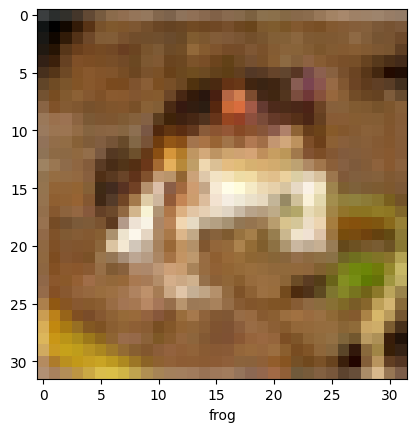

In [ ]:
plotsample(xtrain,ytrain,0)

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 47s 29ms/step - loss: 1.5252 - accuracy: 0.4499
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.2076 - accuracy: 0.5699
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0734 - accuracy: 0.6226
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9890 - accuracy: 0.6508
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9288 - accuracy: 0.6768
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8801 - accuracy: 0.6910
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8385 - accuracy: 0.7078
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8051 - accuracy: 0.7195
Epoch 9/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7646 - accuracy: 0.7326
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [ ]:
cnn.evaluate(xtest,ytest)


313/313 [==============================] - 3s 9ms/step - loss: 0.9285 - accuracy: 0.6887


[0.9285396337509155, 0.6887000203132629]

In [ ]:
ytest=ytest.reshape(-1,)
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
ytest=[classes[i] for i in ytest]

In [ ]:
y_pred=cnn.predict(xtest)


313/313 [==============================] - 3s 8ms/step


In [ ]:
ypred=[classes[np.argmax(i)] for i in y_pred]
ypred[:5],ytest[:5]

(['cat', 'ship', 'ship', 'airplane', 'frog'],
 ['cat', 'ship', 'ship', 'airplane', 'frog'])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

    airplane       0.75      0.73      0.74      1000
  automobile       0.76      0.84      0.80      1000
        bird       0.56      0.56      0.56      1000
         cat       0.49      0.54      0.51      1000
        deer       0.64      0.60      0.62      1000
         dog       0.59      0.64      0.61      1000
        frog       0.78      0.76      0.77      1000
       horse       0.77      0.70      0.73      1000
        ship       0.77      0.82      0.80      1000
       truck       0.83      0.70      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

